In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### Preprocessing

In [3]:
#Missing Values checking
df.isnull().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
# Encode categorical variables
label = LabelEncoder()
df['Revenue'] = label.fit_transform(df['Revenue'])
df['Month'] = label.fit_transform(df['Month'])
df['VisitorType'] = label.fit_transform(df['VisitorType'])
df['Weekend'] = label.fit_transform(df['Weekend'])


In [6]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0


### Visualization

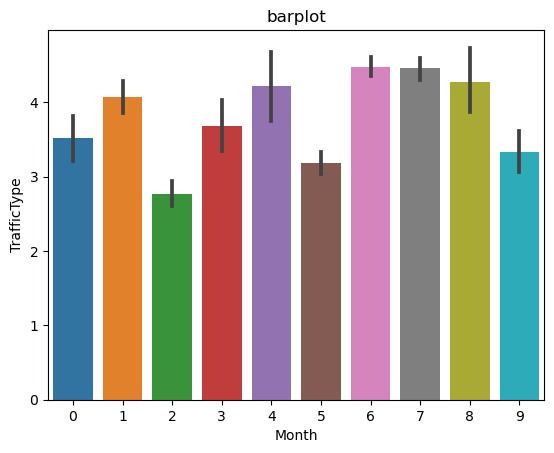

In [9]:
sns.barplot(x=df['Month'], y=df['TrafficType'])
plt.xlabel('Month')
plt.ylabel('TrafficType')
plt.title('barplot')
plt.show()

<Axes: xlabel='Weekend'>

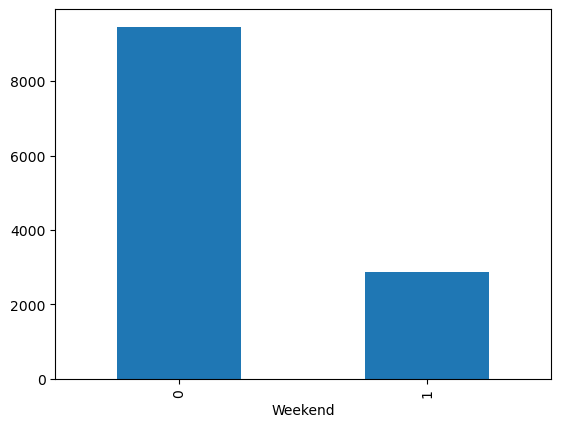

In [21]:
#plotting Weekwnd 
weekend = df.groupby('Weekend').count()
weekend['Administrative'].plot(kind='bar')

<Axes: xlabel='Revenue'>

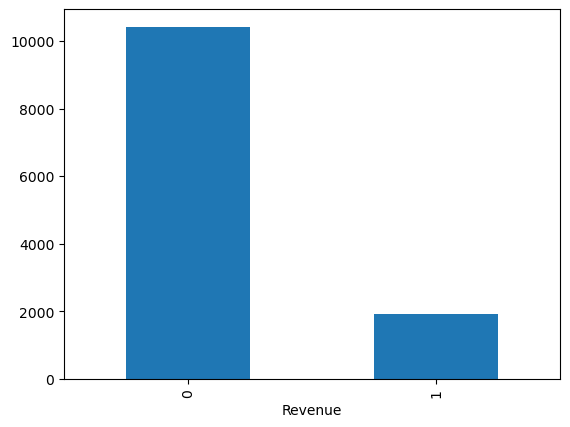

In [29]:
Revenue = df.groupby('Revenue').count()
Revenue['Administrative'].plot(kind='bar')

In [ ]:
# We came to know that classes are not equally present  
#so this dataset is biased(Imbalanced dataset) so we have to add weight to class which has lower number of reords

In [ ]:
# Balancing the dataset

In [30]:
def Sampling(data_col):
    positive_samples = df[df[data_col] == True]
    negative_samples = df[df[data_col] == False]

    positive_count = len(positive_samples)
    negative_count = len(negative_samples)

    # Oversample the minority class to balance the dataset
    oversampled_positive = positive_samples.sample(n=negative_count, replace=True, random_state=42)

    # Combine the oversampled positive class with the negative class
    balanced_data = pd.concat([negative_samples, oversampled_positive])

    # Shuffle the balanced dataset
    balanced_data = balanced_data.sample(frac=1, random_state=42)

    # Check the class distribution after balancing
    print(balanced_data[data_col].value_counts())
Sampling('Revenue')
Sampling('Weekend')

1    10422
0    10422
Name: Revenue, dtype: int64
0    9462
1    9462
Name: Weekend, dtype: int64


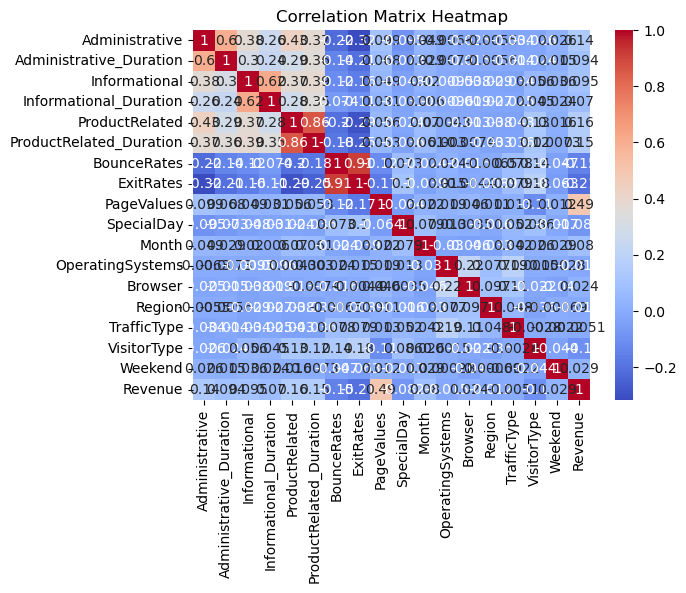

In [31]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [33]:
balanced_data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000,20844.000000
mean,2.770773,95.733439,0.626175,44.830456,38.582422,1484.121220,0.015231,0.033513,14.404838,0.046047,5.356170,2.108856,2.390088,3.107609,4.042602,1.641767,0.244483,0.500000
std,3.546828,186.524344,1.400495,156.410853,51.300578,2121.610033,0.039000,0.040503,28.403951,0.173492,2.379947,0.910788,1.775712,2.392932,3.996521,0.762306,0.429790,0.500012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,10.000000,303.500000,0.000000,0.011765,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,27.533333,0.000000,0.000000,22.000000,805.812500,0.001183,0.020690,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.500000
75%,4.000000,114.259158,1.000000,0.000000,45.000000,1783.385417,0.011111,0.036550,18.111484,0.000000,7.000000,2.000000,2.000000,4.000000,4.000000,2.000000,0.000000,1.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [35]:
# Split the data into training and testing sets
X = balanced_data.drop(['Revenue','Weekend','Informational_Duration'],axis=1)
y = balanced_data[['Revenue','Weekend']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Using the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8589589829695371


In [42]:
# Split the data into training and testing sets
X = balanced_data.drop(['Revenue','Weekend','Informational_Duration'],axis=1)
y = balanced_data[['Informational_Duration']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Using the Random Forest Classifier
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("r2_score:", r2)

C:\Users\Raja.Balasubramani\AppData\Local\Temp\ipykernel_13112\4170860834.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


r2_score: 0.778265456281159
